In [2]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [57]:
# Import data
Loans_df = pd.read_csv("Task 3 and 4_Loan_Data.csv")

In [58]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [59]:
Loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [60]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


# Rating map

Creating a rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score.
The process of doing this is known as quantization.
Creating six buckets for FICO scores ranging from 300 to 850. 

In [61]:
d = {range(800,851):1,range(750,800):2,range(700,750):3,
     range(650,700):4,range(600,650):5,range(300,600):6 }

In [62]:
d

{range(800, 851): 1,
 range(750, 800): 2,
 range(700, 750): 3,
 range(650, 700): 4,
 range(600, 650): 5,
 range(300, 600): 6}

In [63]:
Loans_df['Rating'] = Loans_df['fico_score'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))

In [64]:
Loans_df.groupby('fico_score')['default']

In [65]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5


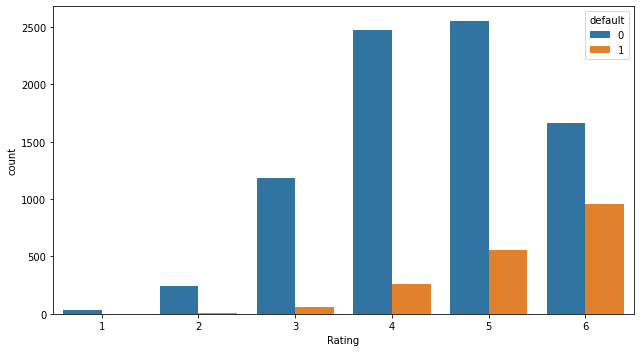

In [66]:
plt.figure(figsize=(9,5))
sns.countplot(x=Loans_df['Rating'],hue=Loans_df['default'])
plt.tight_layout()

In [67]:
Loans_df.groupby('Rating')['default'].value_counts().sort_values()

Rating  default
1       1             1
2       1             7
1       0            33
3       1            62
2       0           243
4       1           263
5       1           558
6       1           960
3       0          1182
6       0          1663
4       0          2475
5       0          2553
Name: count, dtype: int64

In [68]:
Loans_df['ratio_income_Totdebt'] = Loans_df['income']/Loans_df['total_debt_outstanding']
Loans_df['ratio_income_loan_amt'] = Loans_df['income']/Loans_df['loan_amt_outstanding']

In [69]:
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,ratio_income_Totdebt,ratio_income_loan_amt
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,48.825030,15.485222


# Predicting the PD (probability of default) for the borrowers using new ratings 

In [70]:
Loans_df[['default','Rating']]

,default,Rating
0,0,5
1,1,6
2,0,5
3,0,5
4,0,5
...,...,...
9995,0,4
9996,0,5
9997,0,6
9998,0,5


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score


In [72]:
X = Loans_df.drop(['default','fico_score','customer_id'], axis=1)
Y = Loans_df['default']
id_users = Loans_df['customer_id']

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7, random_state=123)

In [74]:
# Create, train, and fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
lr_preds = clf_logistic.predict_proba(X_test)

In [76]:
# # Create dataframes of predictions and true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test

In [77]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default    lr_pred_PD
0           0  2.044388e-01
1           0  9.964434e-09
2           0  1.450456e-12
3           0  3.162185e-07
4           0  1.325936e-06
...       ...           ...
6995        1  5.090299e-01
6996        0  1.286108e-09
6997        0  1.531522e-13
6998        0  7.607506e-11
6999        0  1.332895e-08

[7000 rows x 2 columns]


In [78]:
# Reassign loan status based on the threshold and print the predictions
lr_preds_df['lr_pred_loan_status_60'] = lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default predictions at 60% Threshhold: ")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-Default / Default predictions at 60% Threshhold: 
lr_pred_loan_status_60
0    5766
1    1234
Name: count, dtype: int64


In [79]:
Y_test.value_counts()

default
0    5723
1    1277
Name: count, dtype: int64

In [80]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, lr_preds_df['lr_pred_loan_status_60']))

Confusion Matrix at 60% Threshhold: 
[[5716    7]
 [  50 1227]]


In [81]:
# Print the classification report
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, lr_preds_df['lr_pred_loan_status_60'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      1.00      1.00      5723
     Default       0.99      0.96      0.98      1277

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [82]:
# Print the accuracy score the model
print(clf_logistic.score(X_test, Y_test))

0.9934285714285714


In [83]:
# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

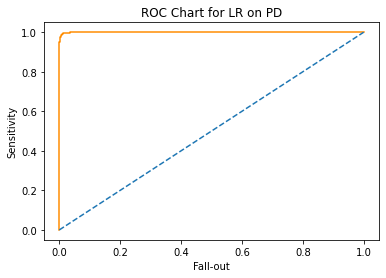

In [84]:
lr_prob_default = lr_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

#  Fitting the Model to entire dataset

In [85]:
Prob_to_default = clf_logistic.predict_proba(X)

In [86]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])

In [87]:
prob_data

,Probability _to_Default
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [93]:
X = pd.concat([id_users,X,Y, prob_data], axis = 1)

In [94]:
X

,customer_id,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,Rating,ratio_income_Totdebt,ratio_income_loan_amt,Probability _to_Default,default,Probability _to_Default
0,8153374,8153374,0,5221.545193,3915.471226,78039.38546,5,5,19.931033,14.945650,0.0,0,0.0
1,7442532,7442532,5,1958.928726,8228.752520,26648.43525,2,6,3.238454,13.603576,1.0,1,1.0
2,2256073,2256073,0,3363.009259,2027.830850,65866.71246,4,5,32.481364,19.585647,0.0,0,0.0
3,4885975,4885975,0,4766.648001,2501.730397,74356.88347,5,5,29.722181,15.599407,0.0,0,0.0
4,4700614,4700614,1,1345.827718,1768.826187,23448.32631,6,5,13.256433,17.422978,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,3972488,0,3033.647103,2553.733144,42691.62787,5,4,16.717341,14.072707,0.0,0,0.0
9996,6184073,6184073,1,4146.239304,5458.163525,79969.50521,8,5,14.651358,19.287238,0.0,0,0.0
9997,6694516,6694516,2,3088.223727,4813.090925,38192.67591,5,6,7.935166,12.367199,0.0,0,0.0
9998,3942961,3942961,0,3288.901666,1043.099660,50929.37206,2,5,48.825030,15.485222,0.0,0,0.0


# Predicting the PD (probability of default) for the borrowers using only new ratings

In [35]:
X = Loans_df['Rating'].to_numpy().reshape(-1,1)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7, random_state=123)

In [40]:
# Create, train, and fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

In [41]:
# Create predictions of probability for loan status using test data
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
lr_preds = clf_logistic.predict_proba(X_test)

In [42]:
# # Create dataframes of predictions and true labels
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test

In [43]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default  lr_pred_PD
0           0    0.372445
1           0    0.372445
2           0    0.092889
3           0    0.092889
4           0    0.017362
...       ...         ...
6995        1    0.197768
6996        0    0.092889
6997        0    0.197768
6998        0    0.092889
6999        0    0.197768

[7000 rows x 2 columns]


In [45]:
# Print the accuracy score the model
print(clf_logistic.score(X_test, Y_test))

0.8175714285714286


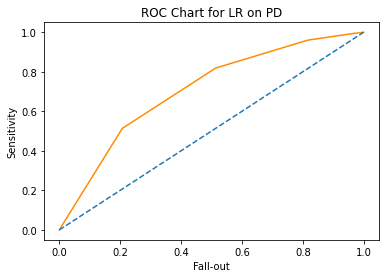

In [46]:
lr_prob_default = lr_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, lr_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for LR on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

#  Fitting the Model to entire dataset

In [47]:
Prob_to_default = clf_logistic.predict_proba(X)

In [48]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])

In [52]:
X = pd.concat([Loans_df, prob_data], axis = 1)

In [53]:
X

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,Probability _to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,0.20
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,0.37
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,0.20
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,0.20
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,0.20
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,0.09
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,0.20
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,0.37
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,0.20


Model built in this way clearly understimate risk of default for low fico scores or low income/total debt ratio , anyway
it could be used to get a "at priori" probability of default for a specific rating category